In [3]:
import os
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

def load_cifar10_data(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Path '{path}' does not exist")
    
    if not os.access(path, os.R_OK):
        raise PermissionError(f"No read permission for '{path}'")
    
    with tarfile.open(path, 'r:gz') as tar:
        tar.extractall()
    
    def unpickle(file):
        import pickle
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict
    
    train_data = []
    train_labels = []
    for i in range(1, 6):
        batch = unpickle('cifar-10-batches-py/data_batch_' + str(i))
        train_data.append(batch[b'data'])
        train_labels.append(batch[b'labels'])
    
    X_train = np.concatenate(train_data).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    y_train = np.concatenate(train_labels)
    
    test_batch = unpickle('cifar-10-batches-py/test_batch')
    X_test = test_batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    y_test = np.array(test_batch[b'labels'])
    
    return (X_train, y_train), (X_test, y_test)

# tar.gz 파일의 경로를 지정합니다.
path = 'C:/program1/class/cifar-10-python.tar.gz'
(X_train, y_train), (X_test, y_test) = load_cifar10_data(path)


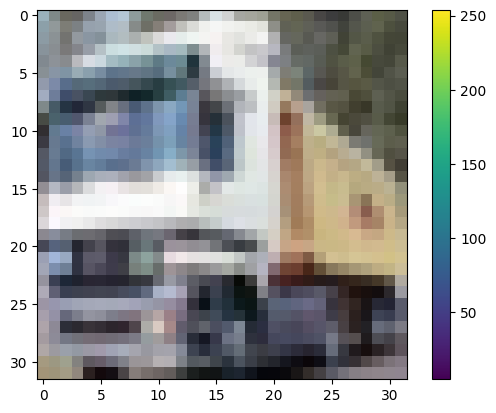

In [4]:
# 두 번째 영상(트럭)을 화면에 표시
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# Sequential model 생성

model = Sequential()
model.add(Conv2D(64, activation='relu', kernel_size=(3,3 )))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, activation='relu', kernel_size=(3,3 )))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
# model compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model fit
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 28s 25ms/step - loss: 1.5552 - accuracy: 0.4387 - val_loss: 1.3760 - val_accuracy: 0.5066
Epoch 2/10
1094/1094 [==============================] - 29s 26ms/step - loss: 1.2543 - accuracy: 0.5525 - val_loss: 1.2242 - val_accuracy: 0.5651
Epoch 3/10
1094/1094 [==============================] - 29s 27ms/step - loss: 1.1135 - accuracy: 0.6063 - val_loss: 1.1748 - val_accuracy: 0.5915
Epoch 4/10
1094/1094 [==============================] - 30s 28ms/step - loss: 1.0148 - accuracy: 0.6414 - val_loss: 1.0646 - val_accuracy: 0.6281
Epoch 5/10
1094/1094 [==============================] - 30s 27ms/step - loss: 0.9324 - accuracy: 0.6735 - val_loss: 1.0658 - val_accuracy: 0.6291
Epoch 6/10
1094/1094 [==============================] - 31s 28ms/step - loss: 0.8589 - accuracy: 0.6994 - val_loss: 1.0407 - val_accuracy: 0.6427
Epoch 7/10
1094/1094 [==============================] - 31s 28ms/step - loss: 0.7888 - accuracy: 0.7239 - val_loss: 1.0539 -

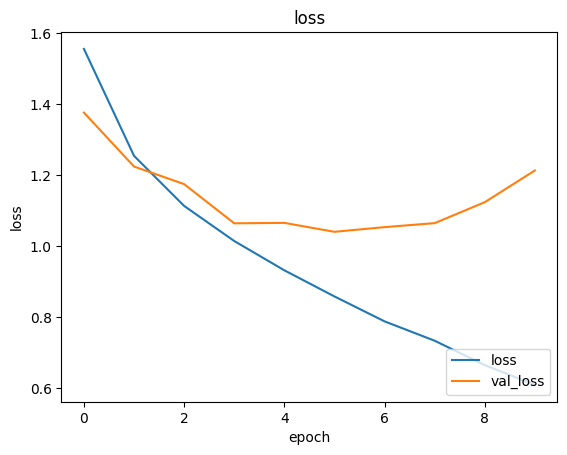

In [7]:
# 손실값 그래프로 나타내기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()

313/313 [==============================] - 3s 10ms/step
정답= 8
예측값= [9.9892650e-06 2.9728774e-02 5.6577600e-09 2.7700404e-08 8.4280194e-11
 8.6433666e-11 2.1943697e-11 4.5859137e-12 9.7021759e-01 4.3586318e-05]


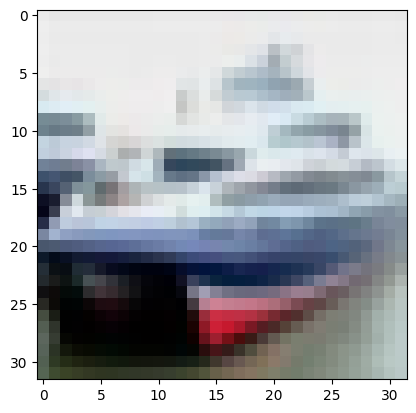

In [8]:
plt.figure()
plt.imshow(X_test[1])
y_pred = model.predict(X_test)
print("정답=", y_test[1])
print("예측값=", y_pred[1])